# Taking a Closer Look at Lego Data

As an exercise in data analysis and linear regressions, lets take a look at some Lego data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setting up the data

Let's get our data loaded into a pandas dataframe and see what we're working with.

In [2]:
df_lego = pd.read_csv('../data/lego_sets.csv')
df_lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [3]:
df_lego.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


In [4]:
df_lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


---

## So, what exactly are we working with?

We've got 12,261 entries total. We can probably drop both descriptions and the product id from our data, which leaves us with:

* Categorical Data
  * Ages
  * Name of the set
  * Difficulty Rating
  * Theme Name
  * Country

* Continuous Numeric Data
  * Price
  * Number of Reviews
  * Star Rating
  * Piece Count


For our purposes we'll be working mostly with the continuous numeric data. We may find a way to work in categorical data, such as exploring trend differences between countries or theme names, if the data allows.


# What can the data tell us?

The most obvious question I'd like to investigate here is whether or not number of pieces in a set can inform a set's list price. As a kid I remember paging through *Lego Magazine* and spotting trends in how pricing seemed to work. Let's see if 8-year-old me had a hypothesis with any value.

**Hypothesis:** There is a noticable and definable correlation between the number of pieces in a set and it's price. This is informed by the idea that more pieces should mean higher material cost, as well as imperical data from my childhood memories.

In [5]:
# Define dependent and independent variables

X = df_lego.piece_count.values
y = df_lego.list_price.values

X = X.reshape(-1,1)

# X(independent) - Pieces in a lego set
# y(dependent) - Price of a lego set in $

<function matplotlib.pyplot.show(close=None, block=None)>

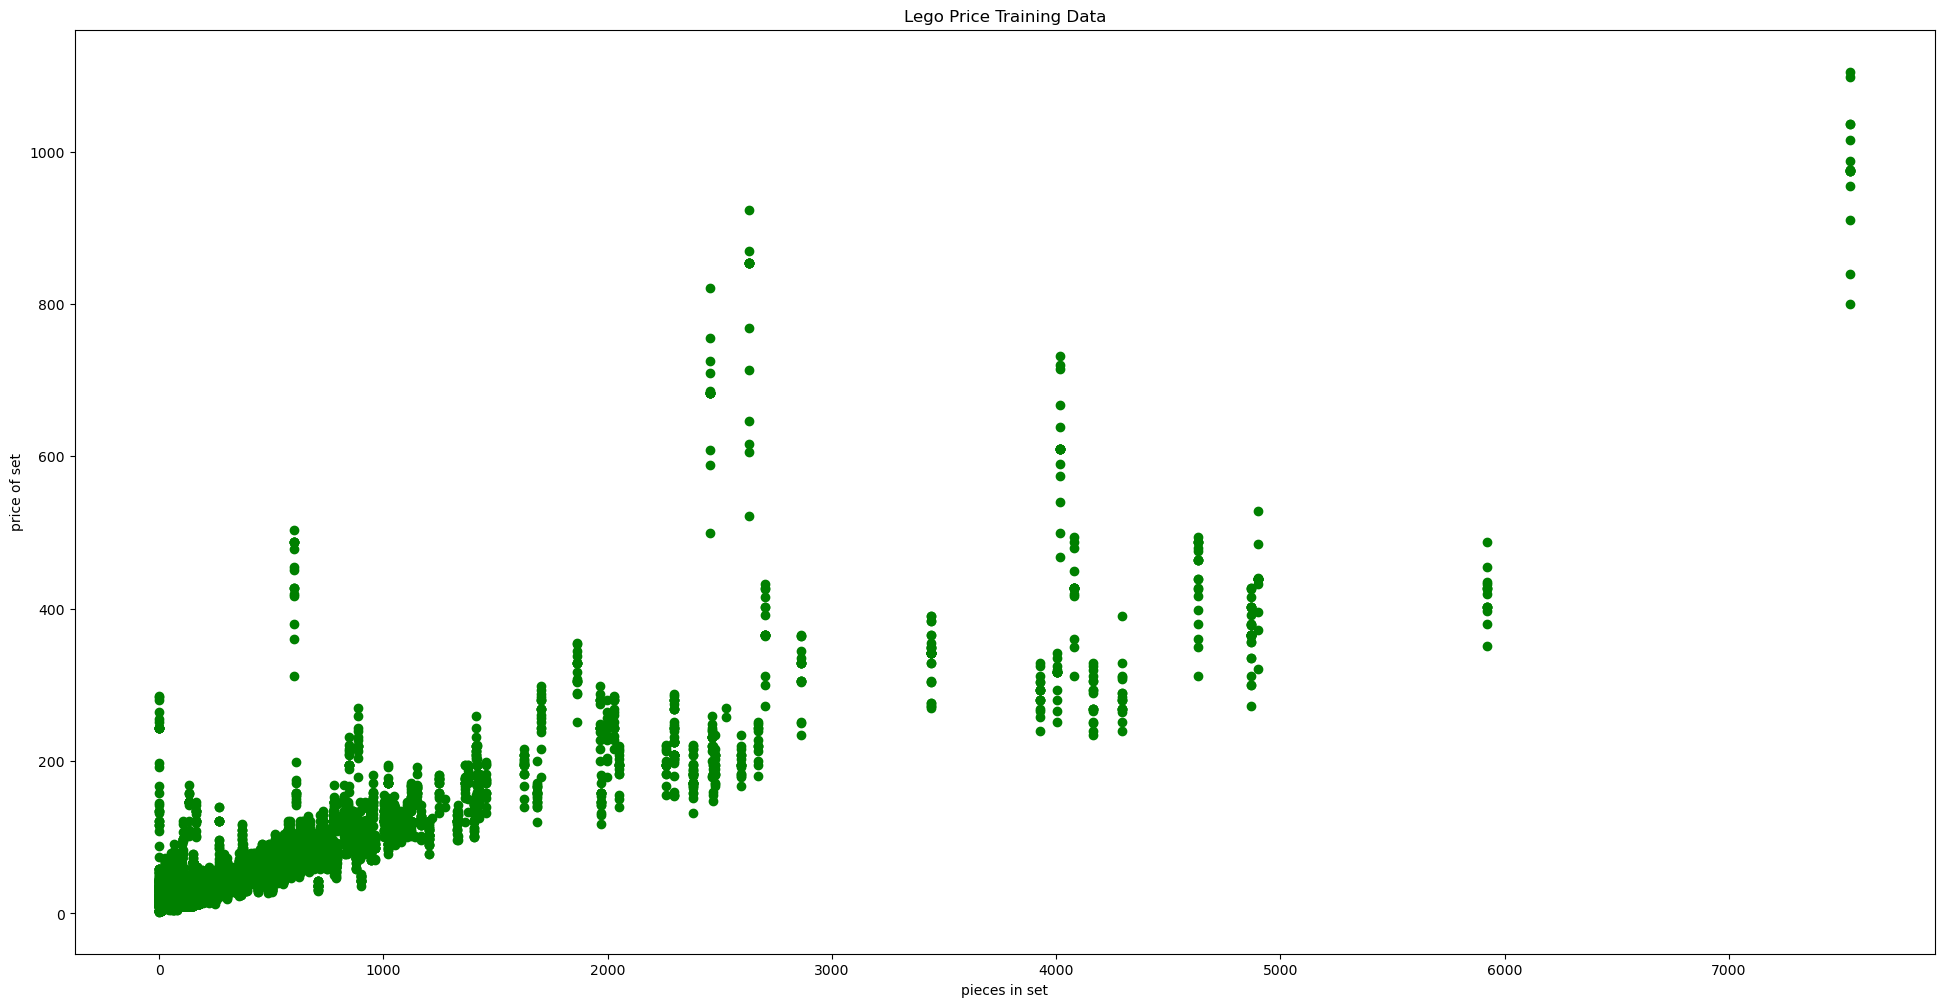

In [6]:
# Separate our training set from the test set

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


# Plot training data for an initial look

%matplotlib inline
plt.rcParams["figure.figsize"] = [24, 12]
plt.scatter(x_train, y_train, color='green')
plt.xlabel('pieces in set')
plt.ylabel('price of set')
plt.title('Lego Price Training Data')
plt.show

Training Data Accuracy: 76.6%
Predictive Data Accuracy: 71.75%


<function matplotlib.pyplot.show(close=None, block=None)>

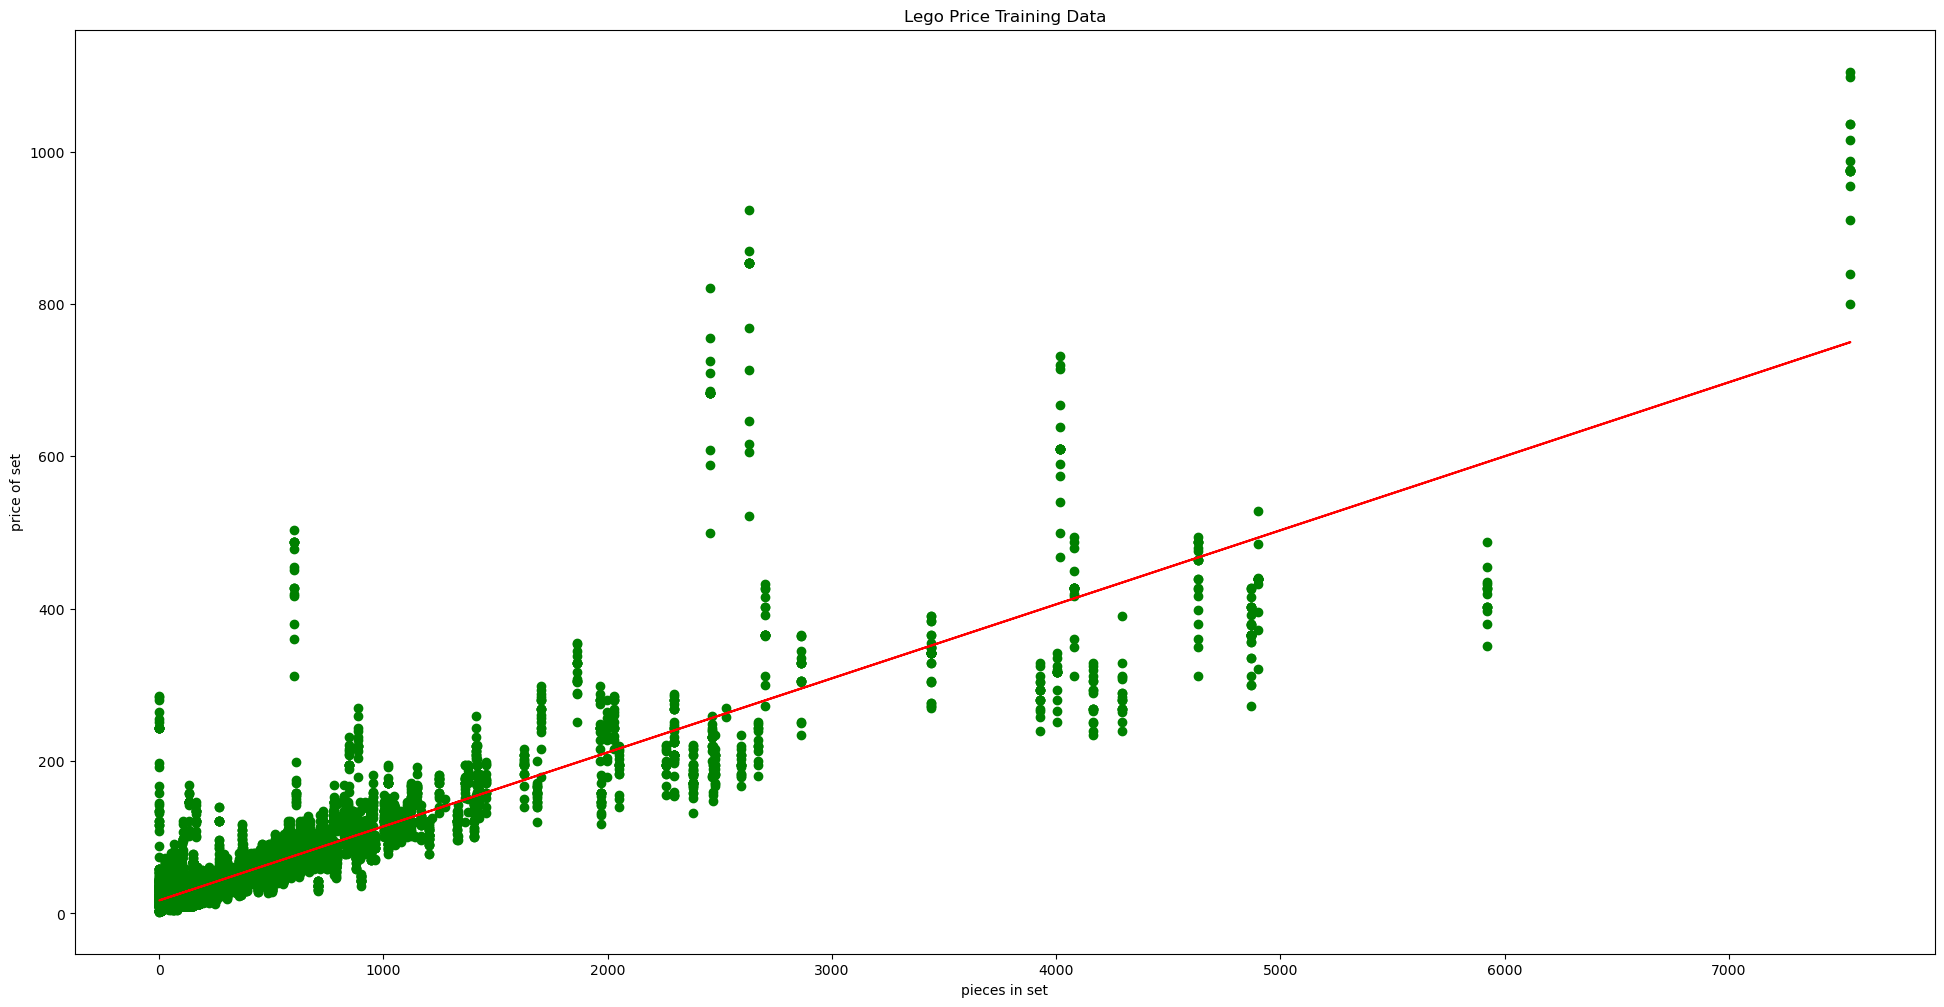

In [7]:
# Create a linear regression model from training data and generate predicted price values

lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

# Calculate Accuracy Scores

train_acc = round(lm.score(x_train, y_train) * 100, 2)
test_acc = round(lm.score(x_test, y_test) * 100, 2)
print(f'Training Data Accuracy: {train_acc}%')
print(f'Predictive Data Accuracy: {test_acc}%')

# Plot prediction model over the data

plt.scatter(x_train, y_train, color='green')
plt.plot(x_test, y_predict, color = 'red')
plt.xlabel('pieces in set')
plt.ylabel('price of set')
plt.title('Lego Price Training Data')
plt.show

# What does the data show?

Wowzer. A straight-forward linear regression performed on piece vs price shows a ~ 76% $R^2$ score for the training data and ~ 72% $R^2$ score for the test data. That's pretty good, and demonstrates that **there is a statistically significant correlation between the number of pieces in a lego set and the price of the set.**

But lets talk about those outliers. It looks like there are certain similarly piece counts where the data varies *drastically*. Around the 2500 to 2800 pieces, the price varies from about 175 to over 900 dollars!

What gives? Let's look at the theme names that have a generally high price.

In [8]:
df_lego[df_lego['list_price'] > 500.00].value_counts('theme_name')

theme_name
SERIOUS PLAY®    43
Star Wars™       40
MINDSTORMS®       1
Name: count, dtype: int64

### Interesting.

It looks like only 3 themes fetch a particularly high price, with SERIOUS PLAY and Star Wars themes being the worst offenders. Lets grab just those two themes and see what we're working with.

---

# Investigating SERIOUS PLAY and Star Wars themes

Since we've isolated the Serious Play and Star Wars themes as being particularly expensive, lets take a look at all sets from each theme.

### SERIOUS PLAY Data

<function matplotlib.pyplot.show(close=None, block=None)>

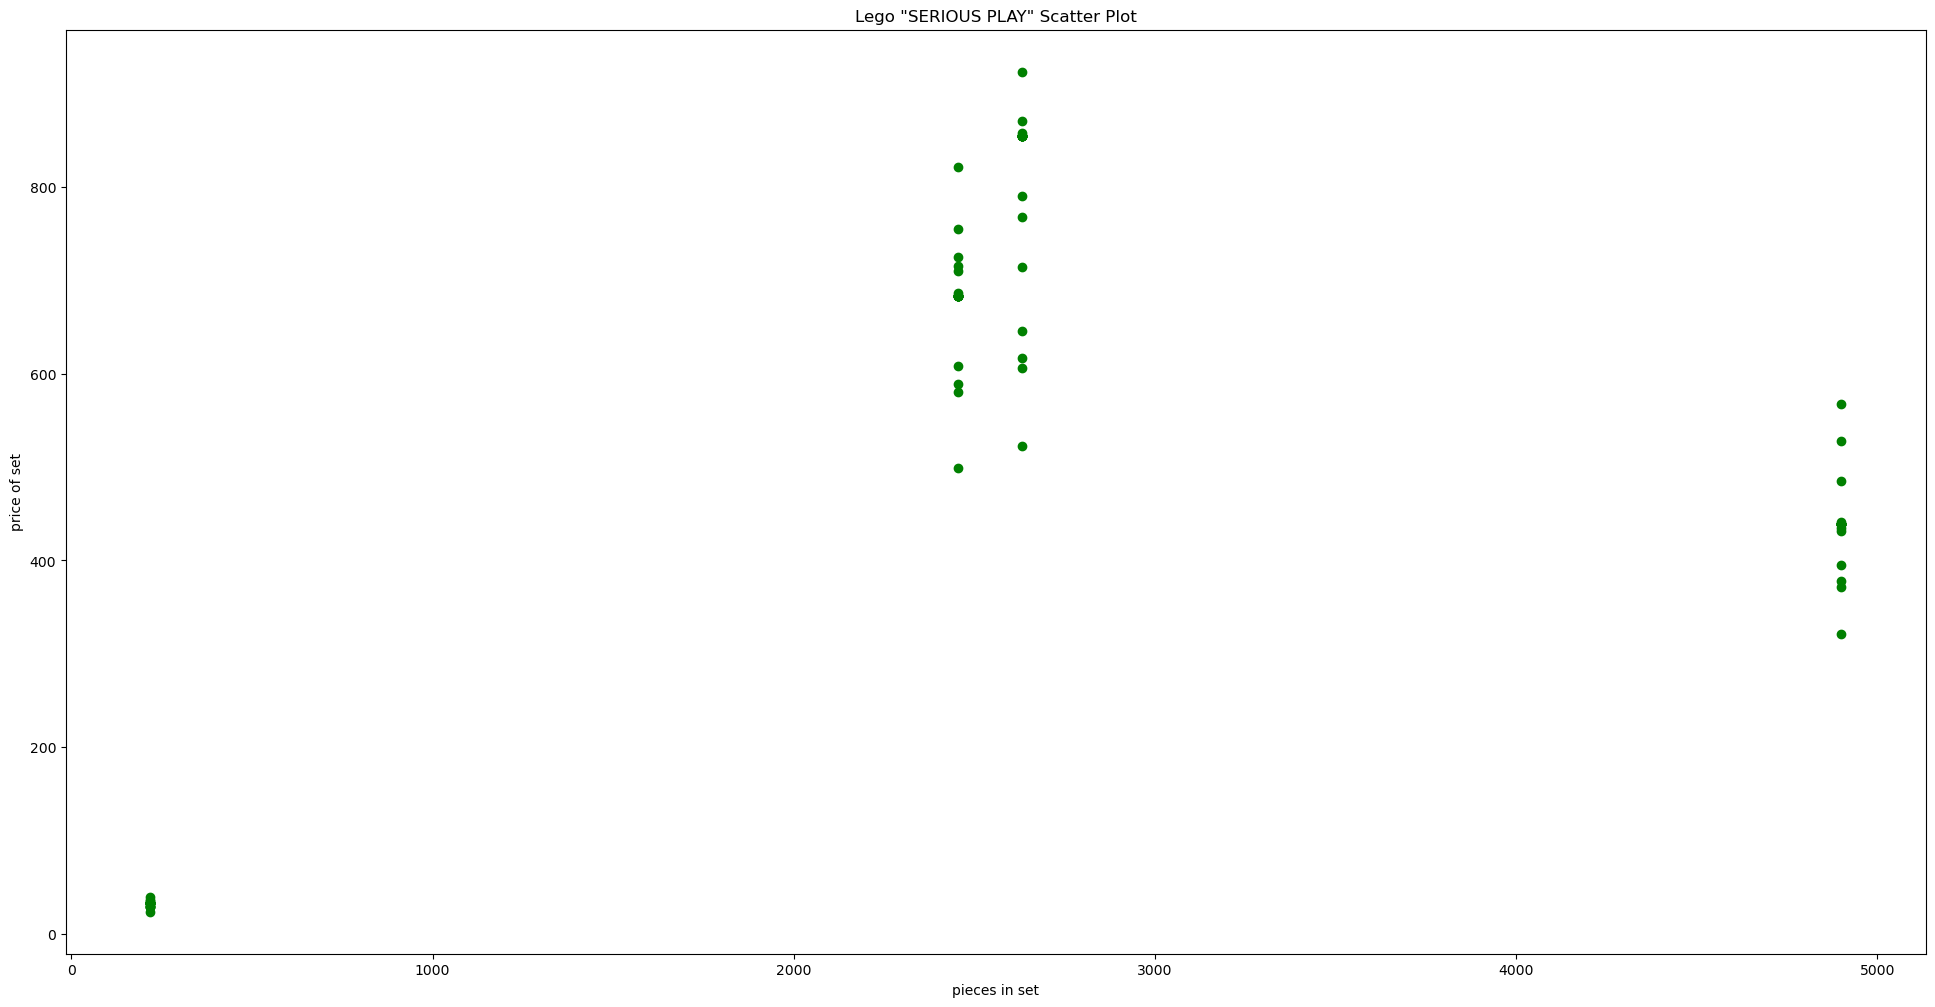

In [9]:
# Filter and plot data for only sets from SERIOUS PLAY theme

df_serious = df_lego.loc[df_lego['theme_name'].str.contains('SERIOUS PLAY', na=False)]

serious_X = df_serious.piece_count.values
serious_X = serious_X.reshape(-1,1)
serious_y = df_serious.list_price.values

plt.scatter(serious_X, serious_y, color='green')
plt.xlabel('pieces in set')
plt.ylabel('price of set')
plt.title('Lego "SERIOUS PLAY" Scatter Plot')
plt.show



### Star Wars Data

<function matplotlib.pyplot.show(close=None, block=None)>

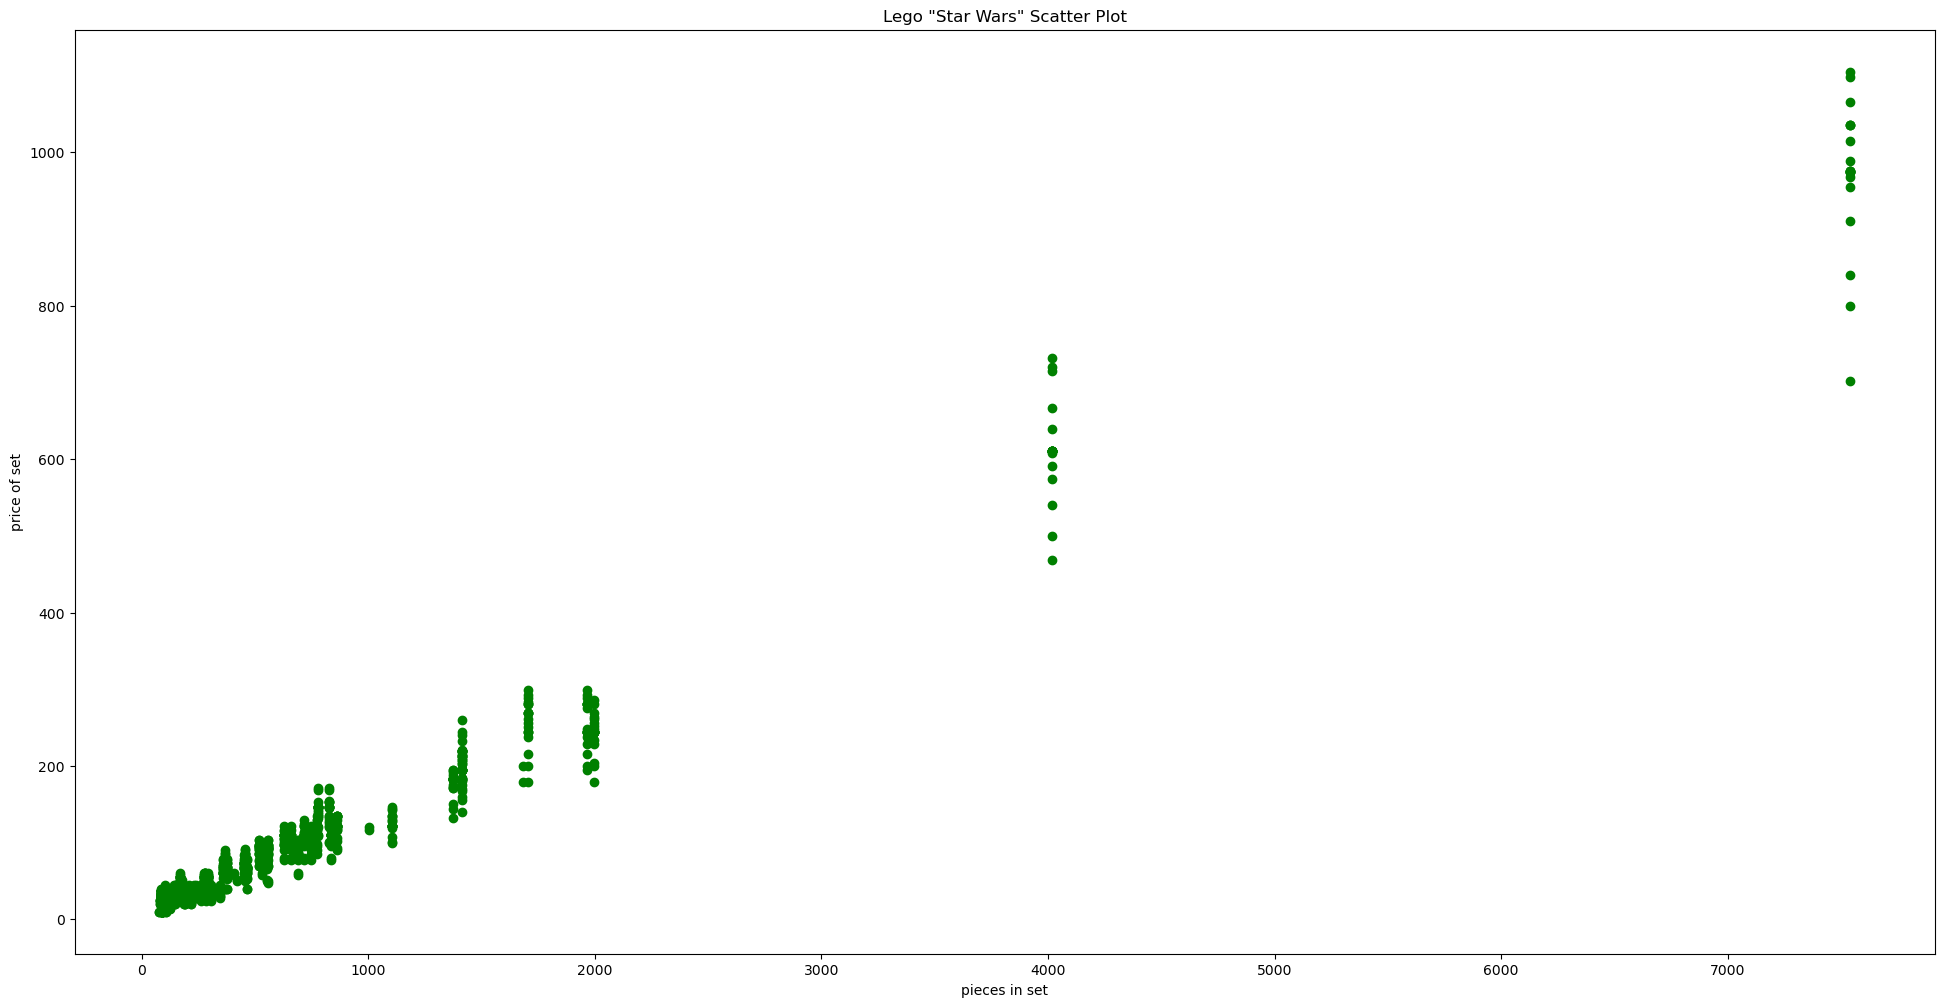

In [10]:
# Filter and plot data for only sets from Star Wars theme

df_starwars = df_lego.loc[df_lego['theme_name'].str.contains('Star Wars', na=False)]
                         
sw_X = df_starwars.piece_count.values
sw_X = sw_X.reshape(-1,1)
sw_y = df_starwars.list_price.values

plt.scatter(sw_X, sw_y, color='green')
plt.xlabel('pieces in set')
plt.ylabel('price of set')
plt.title('Lego "Star Wars" Scatter Plot')
plt.show

## Now let's run a couple quick regressions and see what we can find out

SERIOUS PLAY Training Data Accuracy: 24.1%
SERIOUS PLAY Predictive Data Accuracy: 18.32%

Star Wars Training Data Accuracy: 97.22%
Star Wars Predictive Data Accuracy: 98.06%


<function matplotlib.pyplot.show(close=None, block=None)>

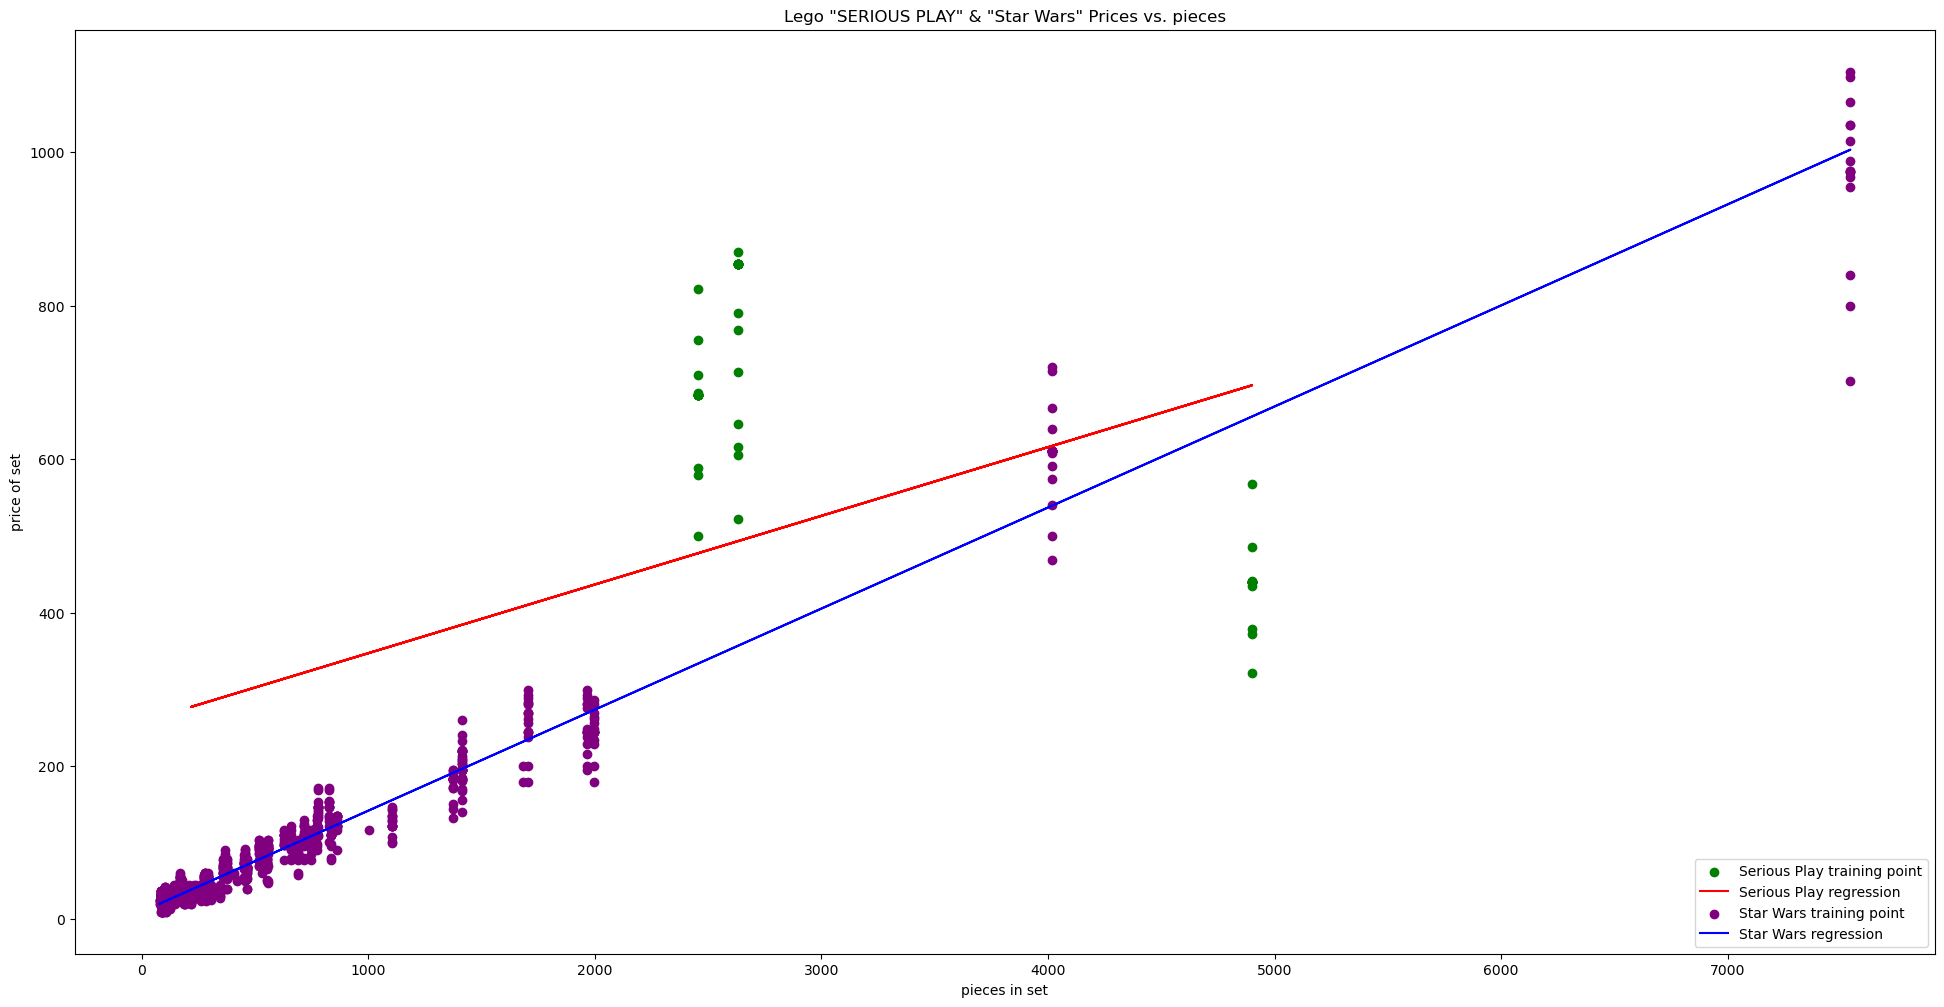

In [11]:
# Serious Play linear regression

serious_x_train, serious_x_test, serious_y_train, serious_y_test = train_test_split(serious_X, serious_y, train_size=0.8, test_size=0.2, random_state=100)

lm.fit(serious_x_train, serious_y_train)
serious_y_predict = lm.predict(serious_x_test)

# Calculate Accuracy Scores and Plot

serious_train_acc = round(lm.score(serious_x_train, serious_y_train) * 100, 2)
serious_test_acc = round(lm.score(serious_x_test, serious_y_test) * 100, 2)
print(f'SERIOUS PLAY Training Data Accuracy: {serious_train_acc}%')
print(f'SERIOUS PLAY Predictive Data Accuracy: {serious_test_acc}%',end='\n\n')

plt.scatter(serious_x_train, serious_y_train, color='green', label="Serious Play training point")
plt.plot(serious_x_test, serious_y_predict, color='red', label="Serious Play regression")
plt.xlabel('pieces in set')
plt.ylabel('price of set')
plt.show

# Star Wars linear regression

sw_x_train, sw_x_test, sw_y_train, sw_y_test = train_test_split(sw_X, sw_y, train_size=0.8, test_size=0.2,random_state=100)

lm.fit(sw_x_train, sw_y_train)
sw_y_predict = lm.predict(sw_x_test)

# Calculating Accuracy Scores and Plotting

sw_train_acc = round(lm.score(sw_x_train, sw_y_train) * 100, 2)
sw_test_acc = round(lm.score(sw_x_test, sw_y_test) * 100, 2)
print(f'Star Wars Training Data Accuracy: {sw_train_acc}%')
print(f'Star Wars Predictive Data Accuracy: {sw_test_acc}%')

plt.scatter(sw_x_train, sw_y_train, color='purple', label="Star Wars training point")
plt.plot(sw_x_test, sw_y_predict, color = 'blue', label="Star Wars regression")
plt.title('Lego "SERIOUS PLAY" & "Star Wars" Prices vs. pieces')
plt.legend(loc='lower right')
plt.show

### Analysis

Based on the regression accuracy results, it seems apparent that Star Wars sets, though expensive, do follow a correlation between number of pieces and price. The SERIOUS PLAY sets do not appear to have a correlation between piece count and price. This could be a result of the SERIOUS PLAY theme being targetted toward businesses and is likely a source of error in our original analysis of all data.

---
# Original Data, sans SERIOUS PLAY

Now that we know that the SERIOUS PLAY theme was likely a large source of error in our original analysis, let's revisit all of the data, but remove the SERIOUS PLAY theme from, uh, *play*.

Training Data Accuracy Without SERIOUS PLAY: 81.36%
Predictive Data Accuracy Without SERIOUS PLAY: 81.18%



<function matplotlib.pyplot.show(close=None, block=None)>

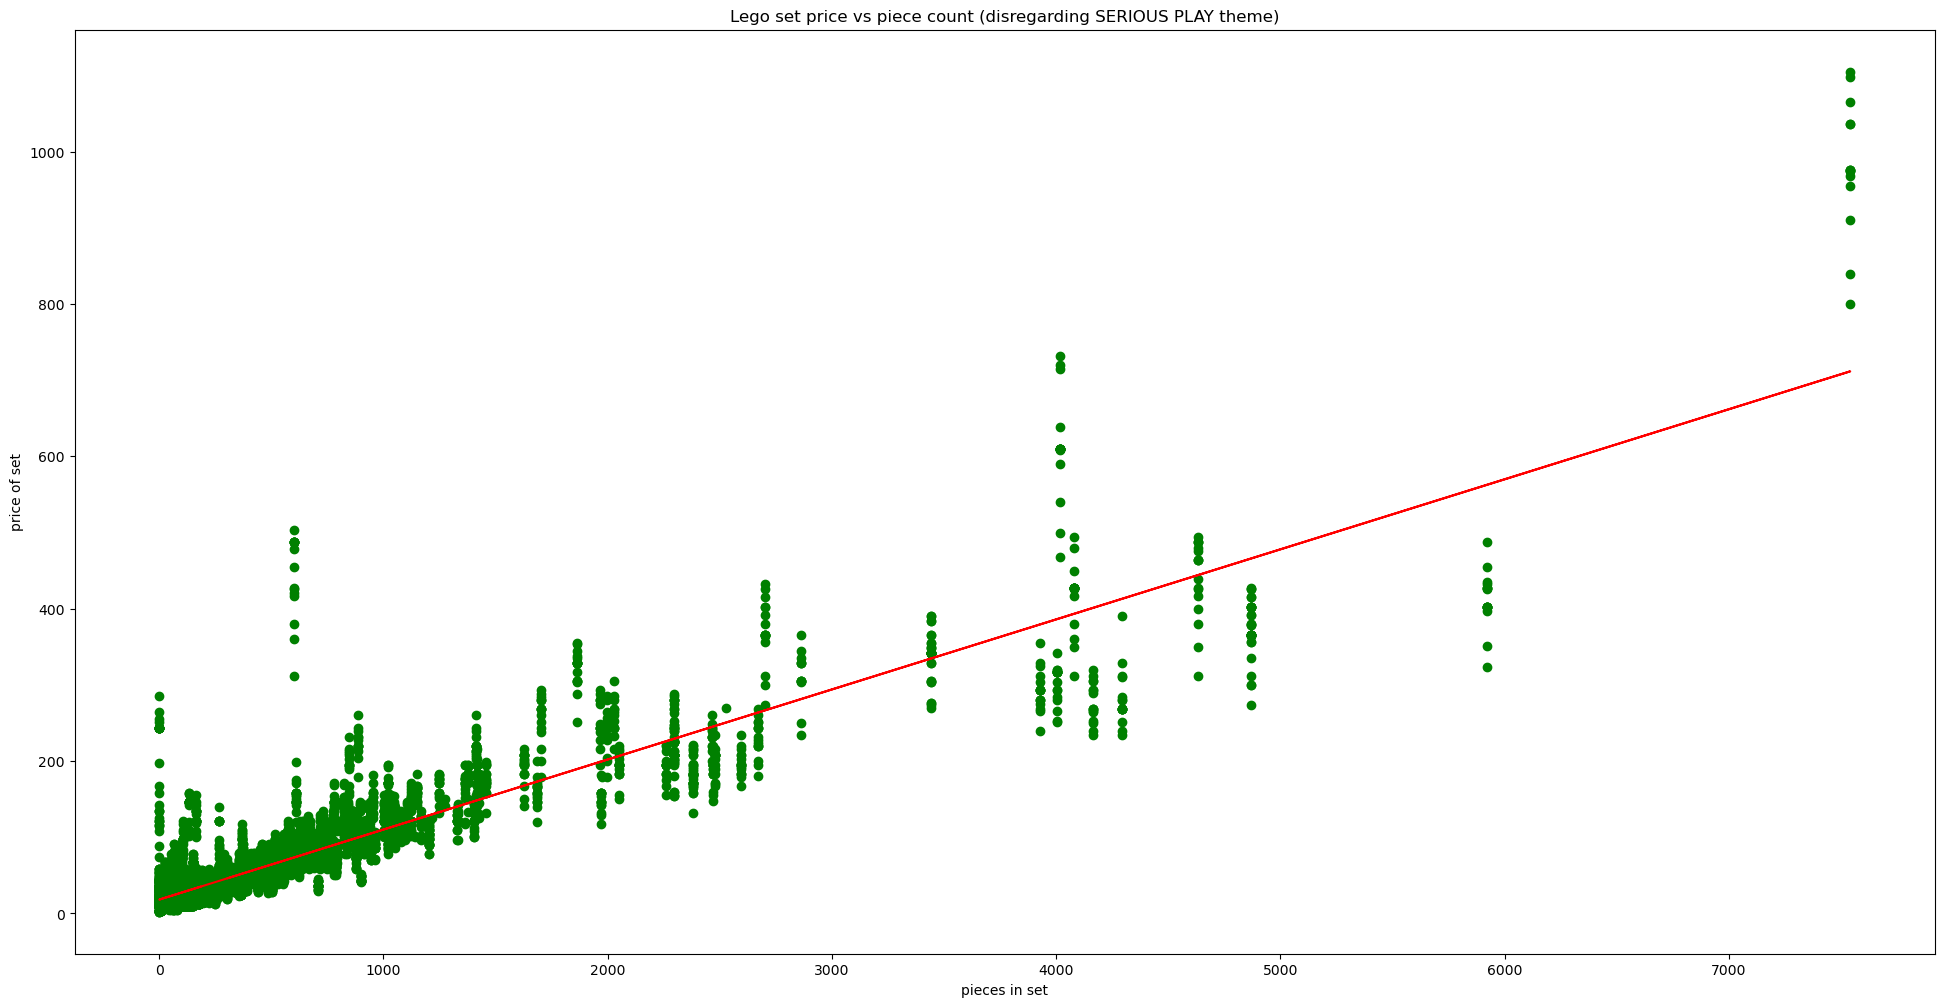

In [12]:
# Filter out SERIOUS PLAY theme

df_not_serious = df_lego.loc[~df_lego['theme_name'].str.contains('SERIOUS PLAY', na=False)]

# Perform linear regression

not_serious_X = df_not_serious.piece_count.values.reshape(-1,1)
not_serious_y = df_not_serious.list_price.values

not_serious_x_train, not_serious_x_test, not_serious_y_train, not_serious_y_test = train_test_split(not_serious_X, not_serious_y, train_size=0.8, test_size=0.2, random_state=100)

lm.fit(not_serious_x_train, not_serious_y_train)
not_serious_y_predict = lm.predict(not_serious_x_test)

# Calculate Accuracy Scores

not_serious_train_acc = round(lm.score(not_serious_x_train, not_serious_y_train) * 100, 2)
not_serious_test_acc = round(lm.score(not_serious_x_test, not_serious_y_test) * 100, 2)
print(f'Training Data Accuracy Without SERIOUS PLAY: {not_serious_train_acc}%')
print(f'Predictive Data Accuracy Without SERIOUS PLAY: {not_serious_test_acc}%',end='\n\n')

# Plot

plt.scatter(not_serious_x_train, not_serious_y_train, color='green', label="training point")
plt.plot(not_serious_x_test, not_serious_y_predict, color='red', label="regression")
plt.xlabel('pieces in set')
plt.ylabel('price of set')
plt.title('Lego set price vs piece count (disregarding SERIOUS PLAY theme)')
plt.show

### Analysis

After removing the SERIOUS PLAY theme, our accuracies are now above 80% and much more closely aligned! Wonderful!

---
## Conclusions

1. Lego sets appear to have a correlation between number of pieces in a set and the listing price of a set.
2. The SERIOUS PLAY theme of lego sets doesn't appear to have a significant correlation between piece count and price. I suspect that this is due to the fact that the SERIOUS PLAY is marketed more towards businesses and focus groups, rather than consumers.
3. Removing just the SERIOUS PLAY theme from the overall data has a significant impact on the $R^2$ value of perfoming a linear regression the data. This appears to reinforce the idea that for most consumer-level lego sets, there is a strong correlation between piece count and price.
4. Star Wars themed sets still appear to be a general outlier when plotting data. It may be worth comparing the coefficients of the Star Wars regression against a regression of all other sets (except SERIOUS PLAY) to see if there is s trend of Star Wars themed sets being priced higher than others per piece.